In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_excel('./actor_2013.xls')
five_num_sum = df.describe()
five_num_sum

,Age
count,44.000000
mean,44.977273
std,9.749153
min,29.000000
25%,38.000000
50%,43.500000
75%,50.250000
max,76.000000


In [4]:
min_val = five_num_sum.loc['min'].values[0]
max_val = five_num_sum.loc['max'].values[0]

Q1 = five_num_sum.loc['25%'].values[0]
Q3 = five_num_sum.loc['75%'].values[0]

span = max_val - min_val
IQR = Q3 - Q1
print('50%% of data reside in the range of % 1.2f' % (IQR))
print('Total span of data is % 2.2f' % span)

50% of data reside in the range of  12.25
Total span of data is  47.00


 - Since total data is spreaded over range of 47, however middle 50% data is spreaded over 12.25 range, this gives a hint, that rest 50% may be diverse in nature.
 - This diversity may have arised due to some extreme value.
 
 In next step we will try to figure out any such extreme value.

In [5]:
extreme_right_threshold = Q3 + (1.5*IQR)
extreme_right_values = df[df['Age'] > extreme_right_threshold]
extreme_right_values

,Age
11,76


In [6]:
extreme_left_threshold = Q1 - 1.5*IQR
extreme_left_values = df[df['Age'] < extreme_left_threshold]
extreme_left_threshold

19.625

- An actor winning the oscar at age of 76 seems to be an exception.
- However, there seems to be no child (since threshold is 19.625) actor has won the oscar yet, so there is no extreme value on the left.

Now, on the basis of what we are trying to infer from data, we may treat actor with age 76 as outlier.

## Box plot
 
 - From the above mentioned five number summary we can plot a boxplot. Boxplot can be used to infer the same thing as we did from five number summary, but in graphical way.

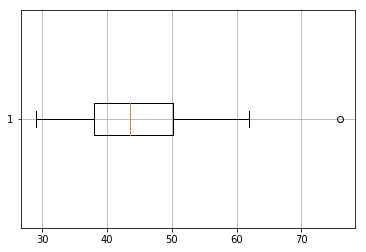

In [7]:
# df.boxplot() 
plt.boxplot(df['Age'], vert=False)
plt.grid()
plt.show()

 - Extreme right value is near 76.
 - Max is someway above 60. Probably 61 or 62.
 - Median is near 43 or 44.
 - Q3 is at 50, Q1 is at around 38.
 - Min is near 29.
 - There is no extreme left value.

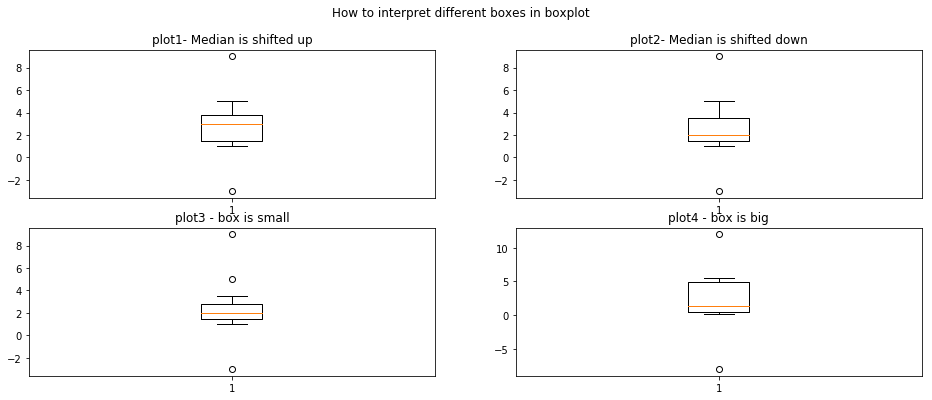

In [8]:
plt.figure(figsize=(16, 6))
plt.suptitle('How to interpret different boxes in boxplot')
plt.tight_layout()

plt.subplot(221)
plt.boxplot(np.array([-3,1,3.5,3.5,3,1,2,3,4,5,9]))
plt.title('plot1- Median is shifted up')

plt.subplot(222)
plt.boxplot(np.array([-3,1,1,2,2,2,2,3,4,5,9]))
plt.title('plot2- Median is shifted down')

plt.subplot(223)
plt.boxplot(np.array([-3,1,1.5,1.5,2,1.5,2,2,3.5,5,9]))
plt.title('plot3 - box is small')

plt.subplot(224)
plt.boxplot(np.array([-8,1.4,1.2,0.2,0.12,5.5,5,4.75,4,0.7,12]))
plt.title('plot4 - box is big')

plt.show()

Box contains 50% of the data.
- **plot1**: Since line is shifted up, so that means upper region is more dense.
- **plot2**: Since line is shifted down, that means lower region is more dense. That is, 25% percent of data reside between Q1 and Median, since Q1 and Median are so closed, that means, these 25% data is very nearby to each other.
- **plot3**: Since box itself is too small, that means, 50% of the data sits very near to each other.
- **plot4**: Since box width is high, that means data is disperse within the IQR range. This is very IQR is high.

## Side by Side box plot

In [13]:
Grad = pd.read_excel('./graduation.xls')
Grad.head(2)

,College,%_grad_on_time
0,A,57.6
1,A,43.2


/Users/ttn/anaconda/lib/python3.6/site-packages/seaborn/categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


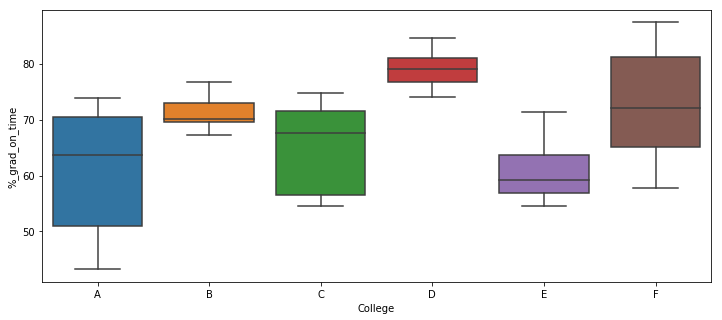

In [20]:
plt.figure(figsize=(12, 5))
ax = sns.boxplot(x="College", y="%_grad_on_time", data=Grad)  # RUN PLOT   
plt.show()

## Analysis
 - College A
     - Center
         - Since center is fairly low as compared to other colleges, that suggest this college consistently fails in matching up the standards.
     - Spread
         - Since box is too big, that means college's performance has not been consistent.
 - Similarly for other college
 
 - Which college would you choose ?
     - College D, as it has low IQR that means it maintains graduation rate and high median signifies that it offers best graduation rate.
     
 - College B or College F ?
     - Both offer same/similar graduation rate.
     - Since variablity is less in B, so i would choose B. 

 - College D has highest graduation rate. This can be due to
     - having too good student in college
     - having too low evaluation standard in college.
 - College A seems to vary a lot.
 - College B, D, and E has shown consistency in results. That means they maintains the standard.